In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [92]:
df = pd.read_parquet('./data/combined data/data.parquet')

In [93]:
df

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
0,NORMAL,257,13,2023-04-30 23:54:00,S Bouquet Ave & Sennott St,2023-04-30 23:59:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
1,NORMAL,351,13,2023-04-30 10:21:00,S Bouquet Ave & Sennott St,2023-04-30 10:27:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
2,NORMAL,310,13,2023-04-30 03:59:00,S Bouquet Ave & Sennott St,2023-04-30 04:04:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
3,NORMAL,408,13,2023-04-30 00:44:00,S Bouquet Ave & Sennott St,2023-04-30 00:50:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
4,NORMAL,417,13,2023-04-29 09:19:00,S Bouquet Ave & Sennott St,2023-04-29 09:26:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387225,NORMAL,1886,43,2023-09-05 20:04:09,Eliza St & Lytle St,2023-09-05 20:35:35,43,Eliza St & Lytle St,CASUAL,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:31:26
387226,NORMAL,242,42,2024-04-29 15:39:00,Second Ave & Tecumseh St,2024-04-29 15:43:00,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:04:00
387227,NORMAL,646,42,2024-04-09 18:06:00,Second Ave & Tecumseh St,2024-04-09 18:16:00,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:10:00
387228,NORMAL,776,42,2024-01-26 11:40:26,Second Ave & Tecumseh St,2024-01-26 11:53:22,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:12:56


In [94]:
df['Month'] = df['Start Date'].dt.month
df['Year'] = df['Start Date'].dt.year

In [95]:
monthly_riders = df.groupby(['Year', 'Month']).size().reset_index(name='Monthly Riders')

In [96]:
monthly_riders

,Year,Month,Monthly Riders
0,2022,5,6097
1,2022,6,9264
2,2022,7,9052
3,2022,8,11275
4,2022,9,14115
5,2022,10,11317
6,2022,11,7417
7,2022,12,3690
8,2023,1,3825
9,2023,2,5685


In [97]:
data = monthly_riders['Monthly Riders']

In [98]:
decomp = seasonal_decompose(data, period=12)

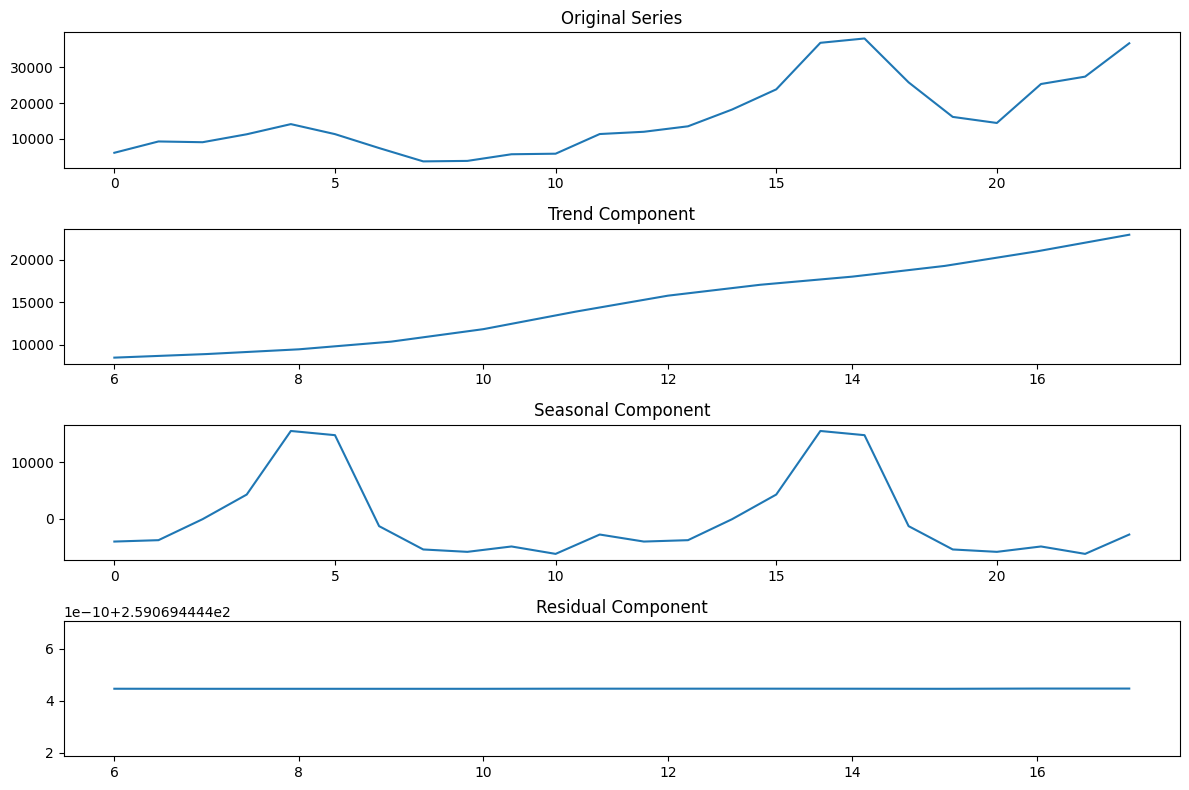

In [99]:
plt.figure(figsize=(12, 8))

# Original series
plt.subplot(4, 1, 1)
plt.plot(monthly_riders.index, monthly_riders['Monthly Riders'], label='Original')
plt.title('Original Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomp.trend.index, decomp.trend, label='Trend')
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomp.seasonal.index, decomp.seasonal, label='Seasonal')
plt.title('Seasonal Component')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(decomp.resid.index, decomp.resid, label='Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [100]:
adfuller_results = adfuller(data)

#### Test for stationarity

In [101]:
print('ADF Statistic: %f' % adfuller_results[0])
print('p-value: %f' % adfuller_results[1])
print('Critical Values:')
for key, value in adfuller_results[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.760045
p-value: 0.990963
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691


#### differencing

<Axes: >

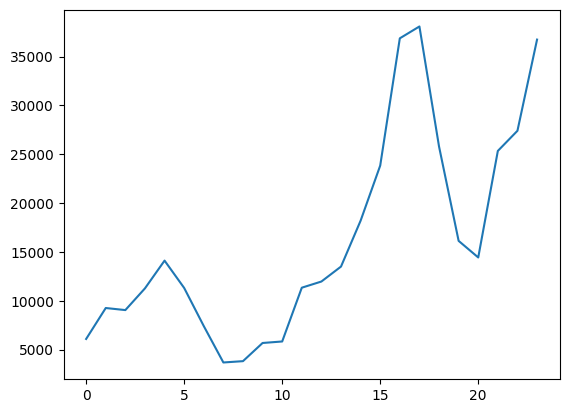

In [102]:
data.plot()

<Axes: >

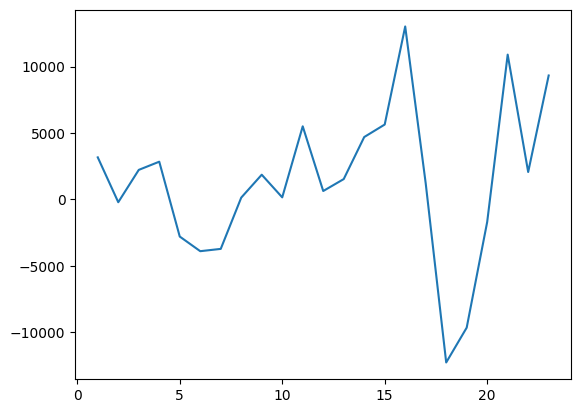

In [103]:
data.diff().plot()

<Axes: >

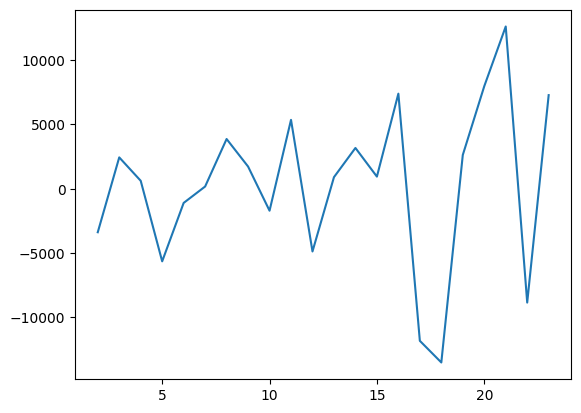

In [104]:
data.diff().diff().plot()

<Axes: >

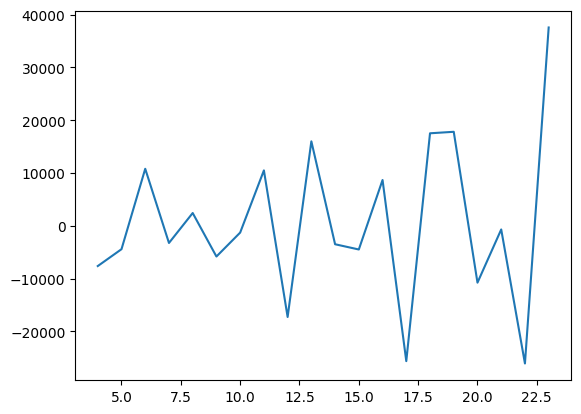

In [105]:
data.diff().diff().diff().diff().plot()

C:\Users\piggy\AppData\Local\Temp\ipykernel_15064\2450018178.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


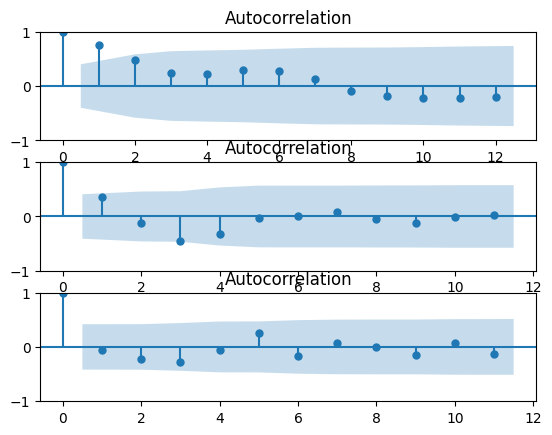

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data, ax=ax1)
plot_acf(data.diff().dropna(), ax=ax2)
plot_acf(data.diff().diff().dropna(), ax=ax3)
fig.show()

d equals 1 or 2

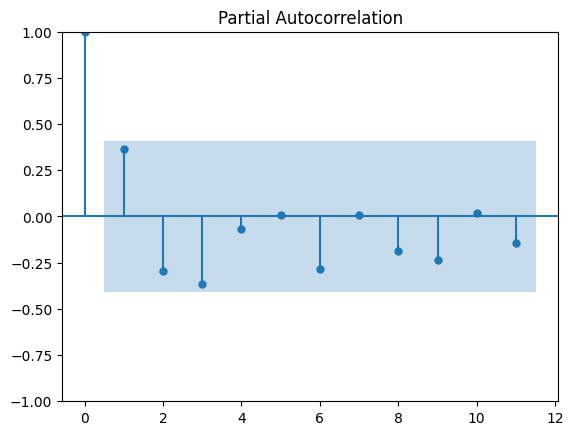

In [110]:
plot_pacf(data.diff().dropna())
plt.show()

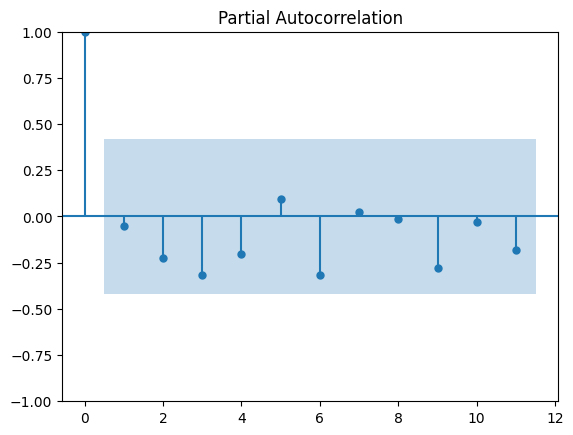

In [111]:
plot_pacf(data.diff().diff().dropna())
plt.show()

p equals 1

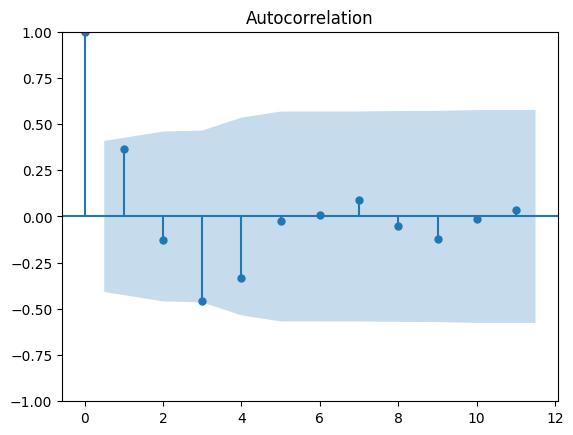

In [114]:
plot_acf(data.diff().dropna())
plt.show()

q = 1

In [240]:
model = ARIMA(data, order=(4, 1, 1))

In [241]:
results = model.fit()

In [242]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         Monthly Riders   No. Observations:                   24
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -227.757
Date:                Sat, 11 May 2024   AIC                            467.515
Time:                        21:35:17   BIC                            474.328
Sample:                             0   HQIC                           469.228
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3595      1.319     -0.273      0.785      -2.945       2.226
ar.L2          0.1274      0.625      0.204      0.838      -1.097       1.352
ar.L3         -0.3208      0.489     -0.656      0.5

In [243]:
forecast = results.forecast(steps=8)

In [244]:
forecast

24    38381.111961
25    34554.641595
26    32435.376454
27    28961.795895
28    30600.035237
29    31568.468426
30    33274.449836
31    33457.540552
Name: predicted_mean, dtype: float64

In [245]:
forecast = forecast.rename(index={24: 5,
                                  25: 6,
                                  26: 7,
                                  27: 8,
                                  28: 9,
                                  29: 10,
                                  30: 11,
                                  31: 12})

In [246]:
total_rides_2022 = df[df['Start Date'].dt.year==2022].groupby(df['Start Date'].dt.month).size()
total_rides_2023 = df[df['Start Date'].dt.year==2023].groupby(df['Start Date'].dt.month).size()
total_rides_2024 = df[df['Start Date'].dt.year==2024].groupby(df['Start Date'].dt.month).size()

In [247]:
forecast[4]=total_rides_2024[4]

In [248]:
forecast.sort_index(inplace=True)

Text(8, 23000, 'City joins POGOH\npartnership program')

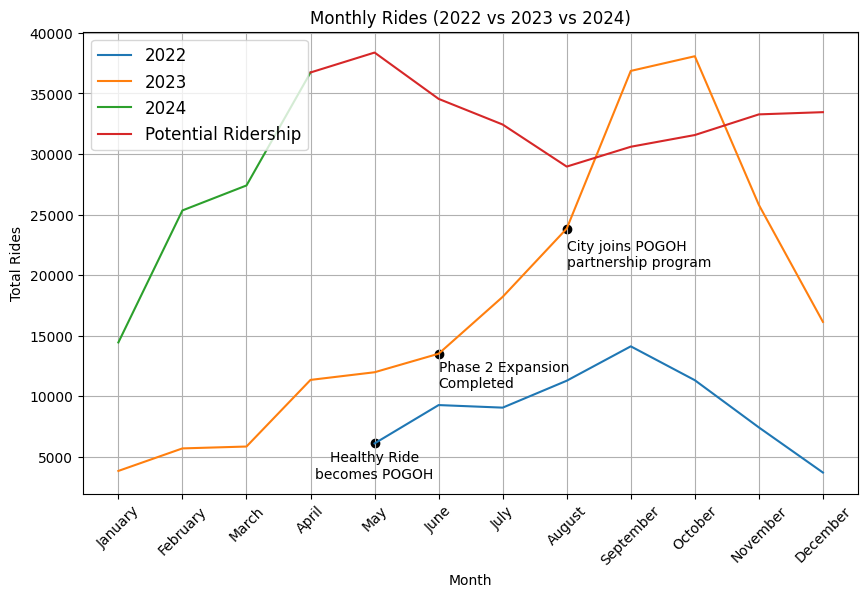

In [249]:
plt.figure(figsize=(10, 6))
plt.plot(total_rides_2022.index, total_rides_2022, label='2022')
plt.plot(total_rides_2023.index, total_rides_2023, label='2023')
plt.plot(total_rides_2024.index, total_rides_2024, label='2024')
plt.plot(forecast.index, forecast, label='Potential Ridership')
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(np.arange(1, len(month_names)+1), month_names, rotation=45)
plt.legend(fontsize='large', loc='upper left')
plt.grid(True)
plt.title("Monthly Rides (2022 vs 2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Total Rides")

plt.scatter(5,6097, color='black')
plt.text(5,5500,'Healthy Ride\nbecomes POGOH', ha='center', va='top')

plt.scatter(6,13505, color='black')
plt.text(6,13000,'Phase 2 Expansion\nCompleted', ha='left', va='top')

plt.scatter(8,23841, color='black')
plt.text(8,23000,'City joins POGOH\npartnership program', ha='left', va='top')